In [1]:
import os
import sys

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))

import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.utils import *

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Modelos preditivo

## Importação e análise dos conjuntos de dados

### CBIS-DDSM

Iniciamos importando o conjunto de dados e realizamos a visualização das 5 primeiras linhas para verificar a estrutura dos dados.

In [2]:
breast_cancer_CBIS = pd.read_csv("../../outputs/mamografia/matriz_features_glcm_CBIS-DDSM.csv")
breast_cancer_CBIS.head()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,dissimilarity_ang_0_dist_3,dissimilarity_ang_45_dist_3,dissimilarity_ang_90_dist_3,dissimilarity_ang_135_dist_3,correlation_ang_0_dist_1,correlation_ang_45_dist_1,...,ASM_ang_135_dist_3,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,energy_ang_0_dist_3,energy_ang_45_dist_3,energy_ang_90_dist_3,energy_ang_135_dist_3,pathology
0,0.796989,0.936951,0.853886,0.960574,1.104016,1.098619,1.102612,1.093094,0.998690,0.998135,...,0.474576,0.689123,0.689054,0.689091,0.689045,0.689050,0.688890,0.688736,0.688895,BENIGN
1,1.231098,1.446281,1.325998,1.504659,1.714750,1.686461,1.739642,1.742159,0.998911,0.998513,...,0.265905,0.516184,0.515934,0.516062,0.515914,0.515644,0.515672,0.515621,0.515659,BENIGN
2,0.786669,0.931541,0.833982,0.958347,1.096969,1.116562,1.160822,1.137839,0.998686,0.998076,...,0.481953,0.694554,0.694418,0.694455,0.694378,0.694310,0.694266,0.694058,0.694228,BENIGN_WITHOUT_CALLBACK
3,0.786669,0.931541,0.833982,0.958347,1.096969,1.116562,1.160822,1.137839,0.998686,0.998076,...,0.481953,0.694554,0.694418,0.694455,0.694378,0.694310,0.694266,0.694058,0.694228,BENIGN_WITHOUT_CALLBACK
4,1.147424,1.354507,1.186222,1.370834,1.610495,1.610298,1.576044,1.579974,0.998917,0.998541,...,0.301521,0.549273,0.549286,0.549392,0.549245,0.549113,0.549106,0.549050,0.549109,BENIGN_WITHOUT_CALLBACK


Visualizamos alguns parâmetros

In [3]:
breast_cancer_CBIS.describe()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,dissimilarity_ang_0_dist_3,dissimilarity_ang_45_dist_3,dissimilarity_ang_90_dist_3,dissimilarity_ang_135_dist_3,correlation_ang_0_dist_1,correlation_ang_45_dist_1,...,ASM_ang_90_dist_3,ASM_ang_135_dist_3,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,energy_ang_0_dist_3,energy_ang_45_dist_3,energy_ang_90_dist_3,energy_ang_135_dist_3
count,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,...,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000
mean,0.850260,1.125499,0.970825,1.140524,1.411832,1.461842,1.475841,1.465892,0.999377,0.999049,...,0.285412,0.285556,0.523289,0.522212,0.522294,0.522197,0.522546,0.521965,0.521845,0.521963
std,0.299587,0.308796,0.272569,0.314063,0.354948,0.362087,0.376876,0.363500,0.000729,0.000828,...,0.120080,0.120198,0.113531,0.114375,0.114271,0.114375,0.114142,0.114517,0.114425,0.114518
min,0.146612,0.234696,0.202975,0.241642,0.334247,0.339252,0.346091,0.343790,0.988412,0.986565,...,0.001267,0.001242,0.052940,0.036735,0.037679,0.036739,0.038961,0.035238,0.035589,0.035239
25%,0.599825,0.917735,0.784400,0.922212,1.171927,1.227507,1.226632,1.230698,0.999252,0.998900,...,0.199229,0.199371,0.447699,0.446827,0.446798,0.446762,0.446996,0.446497,0.446350,0.446510
50%,0.819691,1.084508,0.939918,1.099446,1.372730,1.432822,1.450316,1.438554,0.999497,0.999203,...,0.272141,0.272212,0.523004,0.521996,0.522062,0.521966,0.522443,0.521747,0.521671,0.521739
75%,1.063334,1.301125,1.128357,1.325149,1.618196,1.666267,1.699786,1.672897,0.999714,0.999449,...,0.357691,0.357908,0.599002,0.598386,0.598368,0.598387,0.598562,0.598286,0.598073,0.598254
max,2.731951,2.992770,2.808440,2.985727,3.367682,3.495962,3.409870,3.458831,0.999965,0.999915,...,0.779386,0.779805,0.883105,0.883087,0.882996,0.883076,0.883137,0.883072,0.882828,0.883066


Como último passo, verificamos a distribuição das classes. Após análizar, foi visto que as classes BENIGN e MALIGNANT possuem 40% dos dados cada e os 20% restantes são da classe BENIGN WITHOUT CALLBACK. 

In [4]:
breast_cancer_CBIS["pathology"].value_counts(normalize=True)

MALIGNANT                  0.408352
BENIGN                     0.400504
BENIGN_WITHOUT_CALLBACK    0.191143
Name: pathology, dtype: float64

In [5]:
breast_cancer_CBIS.shape

(3568, 49)

### CMMD

Importamos e visualizamos as 5 primeiras linhas do CMMD

In [6]:
breast_cancer_CMMD = pd.read_csv("../../outputs/mamografia/matriz_features_glcm_CMMD.csv")
breast_cancer_CMMD.head()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,dissimilarity_ang_0_dist_3,dissimilarity_ang_45_dist_3,dissimilarity_ang_90_dist_3,dissimilarity_ang_135_dist_3,correlation_ang_0_dist_1,correlation_ang_45_dist_1,...,ASM_ang_135_dist_3,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,energy_ang_0_dist_3,energy_ang_45_dist_3,energy_ang_90_dist_3,energy_ang_135_dist_3,pathology
0,0.625476,0.707031,0.627003,0.705654,0.849761,0.852868,0.843262,0.836354,0.991534,0.989223,...,0.841153,0.917298,0.917229,0.917193,0.917241,0.917209,0.917115,0.916896,0.917144,Benign
1,1.184211,1.307271,1.150881,1.317487,1.571586,1.544999,1.489975,1.533504,0.989185,0.986792,...,0.661294,0.813474,0.813478,0.813445,0.813389,0.813267,0.813380,0.813187,0.813200,Benign
2,1.140270,1.302220,1.141987,1.289631,1.560706,1.582450,1.577239,1.528206,0.991724,0.989122,...,0.771217,0.878428,0.878354,0.878307,0.878340,0.878300,0.878218,0.877938,0.878190,Benign
3,1.682375,1.903251,1.648690,1.878657,2.259558,2.274373,2.170288,2.173169,0.987955,0.984806,...,0.596873,0.772685,0.772592,0.772693,0.772697,0.772412,0.772365,0.772438,0.772575,Benign
4,1.659040,1.898933,1.665683,1.884636,2.188467,2.233676,2.251008,2.179951,0.986040,0.981888,...,0.609476,0.781069,0.780941,0.780920,0.780936,0.780836,0.780698,0.780388,0.780689,Benign


Visualizamos alguns parâmetros

In [7]:
breast_cancer_CMMD.describe()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,dissimilarity_ang_0_dist_3,dissimilarity_ang_45_dist_3,dissimilarity_ang_90_dist_3,dissimilarity_ang_135_dist_3,correlation_ang_0_dist_1,correlation_ang_45_dist_1,...,ASM_ang_90_dist_3,ASM_ang_135_dist_3,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,energy_ang_0_dist_3,energy_ang_45_dist_3,energy_ang_90_dist_3,energy_ang_135_dist_3
count,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,...,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000
mean,1.773209,1.983014,1.763502,1.982649,2.325649,2.345144,2.327135,2.305698,0.989032,0.986365,...,0.546400,0.546658,0.733159,0.733040,0.733079,0.733041,0.732854,0.732776,0.732612,0.732778
std,0.695062,0.776748,0.699679,0.778693,0.873611,0.894359,0.887608,0.883741,0.002661,0.004246,...,0.140227,0.140368,0.098357,0.098387,0.098328,0.098388,0.098478,0.098473,0.098394,0.098473
min,0.237596,0.256870,0.227297,0.255940,0.344277,0.317300,0.311502,0.313020,0.966044,0.787665,...,0.136201,0.136039,0.369938,0.369619,0.370014,0.369585,0.368870,0.368882,0.369054,0.368834
25%,1.256355,1.408674,1.249474,1.407995,1.668658,1.677202,1.668525,1.650285,0.987367,0.984338,...,0.447308,0.447304,0.669229,0.669136,0.669211,0.669104,0.668841,0.668911,0.668811,0.668808
50%,1.671930,1.877374,1.662888,1.875448,2.201645,2.220277,2.201364,2.178048,0.988750,0.986109,...,0.548619,0.548905,0.741258,0.741153,0.741176,0.741122,0.740960,0.740881,0.740688,0.740881
75%,2.168485,2.421923,2.156655,2.422830,2.812519,2.846111,2.823078,2.804947,0.990376,0.988150,...,0.652573,0.653016,0.808386,0.808281,0.808246,0.808276,0.808172,0.808075,0.807820,0.808094
max,5.352412,8.845956,8.812825,8.835944,6.763680,9.629836,6.738016,9.650875,0.999791,0.999760,...,0.913671,0.913979,0.956095,0.956065,0.956033,0.956070,0.956049,0.956012,0.955861,0.956023


Verificamos a distribuição das classes. Após analisar, foi observado que o conjunto de dados possui um desbalanceamento de classes, com aproximadamente 75% dos dados pertencentes à classe MALIGNANT e os outros 25% à classe BENIGNA. 

In [8]:
breast_cancer_CMMD["pathology"].value_counts(normalize=True)

Malignant    0.746691
Benign       0.253309
Name: pathology, dtype: float64

In [9]:
breast_cancer_CMMD.shape

(5590, 49)

### INBREAST

Importamos e visualizamos as 5 primeiras linhas do conjunto de dados

In [10]:
breast_cancer_INBREAST = pd.read_csv("../../outputs/mamografia/matriz_features_glcm_INBREAST.csv")
breast_cancer_INBREAST.head()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,dissimilarity_ang_0_dist_3,dissimilarity_ang_45_dist_3,dissimilarity_ang_90_dist_3,dissimilarity_ang_135_dist_3,correlation_ang_0_dist_1,correlation_ang_45_dist_1,...,ASM_ang_135_dist_3,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,energy_ang_0_dist_3,energy_ang_45_dist_3,energy_ang_90_dist_3,energy_ang_135_dist_3,pathology
0,0.016037,0.017468,0.015719,0.017442,0.023375,0.022216,0.022405,0.022274,0.997370,0.997112,...,0.781581,0.884444,0.884331,0.884372,0.884333,0.884115,0.884071,0.883897,0.884071,NORMAL
1,0.017885,0.019595,0.017781,0.019532,0.025577,0.024861,0.025191,0.024804,0.997383,0.997089,...,0.744583,0.863376,0.863225,0.863291,0.863231,0.862956,0.862884,0.862705,0.862892,BENIGN
2,0.027353,0.029184,0.026601,0.029546,0.038063,0.035930,0.035288,0.036547,0.996965,0.996790,...,0.657418,0.811537,0.811385,0.811521,0.811337,0.810802,0.810899,0.810777,0.810813,NORMAL
3,0.026346,0.028427,0.025535,0.028125,0.037101,0.035375,0.034291,0.034916,0.996876,0.996582,...,0.664551,0.815822,0.815630,0.815802,0.815675,0.815106,0.815121,0.815061,0.815200,BENIGN
4,0.083185,0.091120,0.083896,0.089706,0.108699,0.111023,0.112860,0.107855,0.994243,0.993665,...,0.302823,0.555955,0.554030,0.555682,0.554339,0.550365,0.549648,0.549058,0.550294,MALIGNANT


Visualizamos alguns parâmetros

In [11]:
breast_cancer_INBREAST.describe()

,dissimilarity_ang_0_dist_1,dissimilarity_ang_45_dist_1,dissimilarity_ang_90_dist_1,dissimilarity_ang_135_dist_1,dissimilarity_ang_0_dist_3,dissimilarity_ang_45_dist_3,dissimilarity_ang_90_dist_3,dissimilarity_ang_135_dist_3,correlation_ang_0_dist_1,correlation_ang_45_dist_1,...,ASM_ang_90_dist_3,ASM_ang_135_dist_3,energy_ang_0_dist_1,energy_ang_45_dist_1,energy_ang_90_dist_1,energy_ang_135_dist_1,energy_ang_0_dist_3,energy_ang_45_dist_3,energy_ang_90_dist_3,energy_ang_135_dist_3
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,0.043193,0.047588,0.043223,0.047593,0.059492,0.059137,0.060378,0.059112,0.996339,0.995909,...,0.487616,0.487984,0.696396,0.695743,0.696306,0.695743,0.694333,0.694226,0.693950,0.694229
std,0.017056,0.018096,0.017268,0.018078,0.020502,0.020903,0.021507,0.020867,0.000974,0.001034,...,0.109224,0.109110,0.076649,0.076975,0.076672,0.076976,0.077700,0.077751,0.077869,0.077750
min,0.007549,0.009356,0.007691,0.009553,0.015099,0.014534,0.015539,0.014863,0.992977,0.992312,...,0.250850,0.250866,0.506457,0.505075,0.506576,0.504923,0.500751,0.501166,0.500849,0.500865
25%,0.030933,0.034055,0.030617,0.034185,0.044344,0.043475,0.044637,0.043315,0.995666,0.995232,...,0.405714,0.406423,0.639723,0.638973,0.639572,0.639092,0.637581,0.637177,0.636957,0.637513
50%,0.041357,0.045935,0.041207,0.045930,0.058158,0.057361,0.058295,0.057473,0.996489,0.996025,...,0.481791,0.482467,0.696523,0.695910,0.696340,0.695952,0.694737,0.694458,0.694112,0.694598
75%,0.054082,0.059064,0.054332,0.060109,0.072835,0.073169,0.075449,0.073654,0.997045,0.996687,...,0.559619,0.560107,0.749465,0.749086,0.749340,0.749142,0.748493,0.748281,0.748077,0.748403
max,0.097078,0.103722,0.098008,0.105129,0.120376,0.120490,0.124476,0.123251,0.999165,0.998935,...,0.822334,0.822631,0.907254,0.907179,0.907190,0.907176,0.907021,0.906995,0.906827,0.906990


Verificamos a distribuição das classes. Após analisar, foi observado que o conjunto de dados possui um desbalanceamento de classes, com aproximadamente 75% dos dados pertencentes à classe BENIGN e os outros 25% à classe MALIGNANT. 

In [12]:
breast_cancer_INBREAST["pathology"].value_counts(normalize=True)

BENIGN       0.643902
MALIGNANT    0.192683
NORMAL       0.163415
Name: pathology, dtype: float64

In [13]:
breast_cancer_INBREAST.shape

(410, 49)

## Pré-Processamento

### CBIS-DDSM

Para ter o conjunto de dados com classes balanceadas, eliminamos os dados com classe BENIGN WITHOUT CALLBACK. 

In [14]:
breast_cancer_CBIS = breast_cancer_CBIS[breast_cancer_CBIS["pathology"] != "BENIGN_WITHOUT_CALLBACK"]
breast_cancer_CBIS["pathology"].value_counts(normalize=True)

MALIGNANT    0.504851
BENIGN       0.495149
Name: pathology, dtype: float64

Nesta Etapa, realizamos a separação dos dados em Features e labels

In [15]:
X_CBIS, y_CBIS = (breast_cancer_CBIS.drop("pathology", axis=1), breast_cancer_CBIS["pathology"])
X_CBIS.shape, y_CBIS.shape

((2886, 48), (2886,))

Para treinar e avaliar os modelos, realizamos a divisão dos dados em conjunto de treino e conjunto de teste. Utilizamos 80% dos dados para o conjunto de treino e os 80% restantes para o conjunto de teste.

In [16]:
X_train_CBIS, X_test_CBIS, y_train_CBIS, y_test_CBIS = train_test_split(X_CBIS, y_CBIS, test_size=0.30)
X_train_CBIS.shape, X_test_CBIS.shape, y_train_CBIS.shape, y_test_CBIS.shape

((2020, 48), (866, 48), (2020,), (866,))

Realizamos a padronização dos dados, pois os modelos costumam apresentar um melhor desempenho quando aplicados a dados padronizados.

In [17]:
columns = X_CBIS.columns

scaler = StandardScaler()
X_train_CBIS = pd.DataFrame(scaler.fit_transform(X_train_CBIS), columns=columns)
X_test_CBIS = pd.DataFrame(scaler.transform(X_test_CBIS), columns=columns)

Na etapa final de pré-processamento, realizamos o tratamento das variáveis categóricas utilizando a abordagem Label Enconding. 

In [18]:
y_train_CBIS = y_train_CBIS.map({"BENIGN": 0, "MALIGNANT": 1})
y_test_CBIS = y_test_CBIS.map({"BENIGN": 0, "MALIGNANT": 1})

### CMMD

Nesta Etapa, realizamos a separação dos dados em Features e labels

In [19]:
X_CMMD, y_CMMD = (breast_cancer_CMMD.drop("pathology", axis=1), breast_cancer_CMMD["pathology"])
X_CMMD.shape, y_CMMD.shape

((5590, 48), (5590,))

Para balancear o conjunto de dados, utilizamos o método de Undersampling. A escolha desse método foi devido ao conjuntos de dados ter uma grande quantidade de dados.

In [20]:
nm = NearMiss(version=1)
X_CMMD, y_CMMD = nm.fit_resample(X_CMMD, y_CMMD)

y_CMMD.value_counts(normalize=True)

Benign       0.5
Malignant    0.5
Name: pathology, dtype: float64

In [21]:
X_CMMD.shape

(2832, 48)

Dividimos os dados em validação e teste. 

In [22]:
X_train_CMMD, X_test_CMMD, y_train_CMMD, y_test_CMMD = train_test_split(X_CMMD, y_CMMD, test_size=0.30)
X_train_CMMD.shape, X_test_CMMD.shape, y_train_CMMD.shape, y_test_CMMD.shape

y_train_CMMD.value_counts(normalize=True), y_test_CMMD.value_counts(normalize=True)

(Malignant    0.504541
 Benign       0.495459
 Name: pathology, dtype: float64,
 Benign       0.510588
 Malignant    0.489412
 Name: pathology, dtype: float64)

Realizamos a padronização dos dados

In [23]:
columns = X_CMMD.columns

scaler = StandardScaler()
X_train_CMMD = pd.DataFrame(scaler.fit_transform(X_train_CMMD), columns=columns)
X_test_CMMD = pd.DataFrame(scaler.transform(X_test_CMMD), columns=columns)

Transformação dos dados categóricos

In [24]:
y_train_CMMD = y_train_CMMD.map({"Benign": 0, "Malignant": 1})
y_test_CMMD = y_test_CMMD.map({"Benign": 0, "Malignant": 1})

### INBREAST

Para fins de padronização, excluímos os dados com classe NORMAL do conjunto de dados

In [25]:
breast_cancer_INBREAST = breast_cancer_INBREAST[breast_cancer_INBREAST["pathology"] != "NORMAL"]
breast_cancer_INBREAST["pathology"].value_counts(normalize=True)

BENIGN       0.769679
MALIGNANT    0.230321
Name: pathology, dtype: float64

Realizamos a divisão dos dados em features e label

In [26]:
X_INBREAST, y_INBREAST = (breast_cancer_INBREAST.drop("pathology", axis=1), breast_cancer_INBREAST["pathology"])
X_INBREAST.shape, y_INBREAST.shape

((343, 48), (343,))

Realizamos o balanceamento das classes. Pelo fato do conjunto de dados ser pequeno, utilizamos um método de Overshampling. Os métodos de Overshampling geram novas amostras da classe minoritária.

In [27]:
smote = SMOTE()
X_INBREAST, y_INBREAST = smote.fit_resample(X_INBREAST, y_INBREAST)

y_INBREAST.value_counts(normalize=True)

BENIGN       0.5
MALIGNANT    0.5
Name: pathology, dtype: float64

In [28]:
X_INBREAST.shape

(528, 48)

Dividimos os dados em validação e teste.

In [29]:
X_train_INBREAST, X_test_INBREAST, y_train_INBREAST, y_test_INBREAST = train_test_split(X_INBREAST, 
                                                                                        y_INBREAST, test_size=0.30)
X_train_INBREAST.shape, X_test_INBREAST.shape, y_train_INBREAST.shape, y_test_INBREAST.shape

y_train_INBREAST.value_counts(normalize=True), y_test_INBREAST.value_counts(normalize=True)

(BENIGN       0.506775
 MALIGNANT    0.493225
 Name: pathology, dtype: float64,
 MALIGNANT    0.515723
 BENIGN       0.484277
 Name: pathology, dtype: float64)

Realizamos a padronização dos dados

In [30]:
columns = X_INBREAST.columns

scaler = StandardScaler()
X_train_INBREAST = pd.DataFrame(scaler.fit_transform(X_train_INBREAST), columns=columns)
X_test_INBREAST = pd.DataFrame(scaler.transform(X_test_INBREAST), columns=columns)

Tratamos os dados categóricos

In [31]:
y_train_INBREAST = y_train_INBREAST.map({"BENIGN": 0, "MALIGNANT": 1})
y_test_INBREAST = y_test_INBREAST.map({"BENIGN": 0, "MALIGNANT": 1})

## Treinamento dos modelos

### Variáveis

In [32]:
angles = ["0", "45", "90", "135"]
distances = ['1', '3']
threshold = 0.5 # Definir o limiar
kf = KFold(n_splits=5)

### Funções

In [33]:
# Função para criar o modelo do Keras
def create_mlp_model(shape):
    model = Sequential()
    model.add(Dense(50, input_dim=shape, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model


def evaluate_mlp_model(model, data, target, n_splits, n_epochs, batch_size, threshold=0.5):
    kf = KFold(n_splits = n_splits)
    
    acc = []
    for train_index, test_index in kf.split(data, target): 
        model.fit(data.iloc[train_index], target.iloc[train_index], 
                  epochs=n_epochs, batch_size=batch_size)
        
        y_pred = model.predict(data.iloc[test_index])
        
        # Definir o limiar
        threshold = threshold

        # Transformar as saídas em rótulos
        y_pred = (y_pred > threshold).astype(int)
        
        acc.append(accuracy_score(y_pred, target.iloc[test_index]))

    return (np.array(acc)).mean() * 100

### KNeighborsClassifier

In [34]:
# Treina com todos os angulos e distancias
knn_model = KNeighborsClassifier(n_neighbors=5, weights="distance", metric="euclidean", algorithm="auto")

# knn_model.fit(X_train_INBREAST, y_train_INBREAST)
# predict = knn_model.predict(X_test_INBREAST)
# acurracy = accuracy_score(y_test_INBREAST, predict) * 100
acurracy = (cross_val_score(knn_model, X_test_INBREAST, y_test_INBREAST, cv=kf).mean()) * 100

# predicts = {"KNeighborsClassifier": {"all": predict}}
scores = {"KNeighborsClassifier": {"all": {"accuracy_score": acurracy}}}

""" for distance in distances:
    for angle in angles:
        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]
        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]
        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]

        knn_model = KNeighborsClassifier(n_neighbors=5, weights="distance", metric="euclidean", algorithm="auto")
        # knn_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)
        # predict = knn_model.predict(X_test_INBREAST_filtered)
        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100
        acurracy = (cross_val_score(knn_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100

        #predicts["KNeighborsClassifier"][f"ang_{angle}_dist_{distance}"] = predict
        scores["KNeighborsClassifier"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} """

' for distance in distances:\n    for angle in angles:\n        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]\n        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]\n        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]\n\n        knn_model = KNeighborsClassifier(n_neighbors=5, weights="distance", metric="euclidean", algorithm="auto")\n        # knn_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)\n        # predict = knn_model.predict(X_test_INBREAST_filtered)\n        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100\n        acurracy = (cross_val_score(knn_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100\n\n        #predicts["KNeighborsClassifier"][f"ang_{angle}_dist_{distance}"] = predict\n        scores["KNeighborsClassifier"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} '

### Random Forest Classifier

In [35]:
# Treina com todos os angulos e distancias
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=10, criterion="gini", 
                                             min_samples_leaf=3, min_samples_split=2)
# random_forest_model.fit(X_train_INBREAST, y_train_INBREAST)
# predict = random_forest_model.predict(X_test_INBREAST)
# acurracy = accuracy_score(y_test_INBREAST, predict) * 100
acurracy = (cross_val_score(random_forest_model, X_test_INBREAST, y_test_INBREAST, cv=kf).mean()) * 100

# predicts["RandomForestClassifier"] = {"all": predict}
scores["RandomForestClassifier"] = {"all": {"accuracy_score": acurracy}}

""" for distance in distances:
    for angle in angles:
        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]
        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]
        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]
        
        random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=10, criterion="gini", 
                                                     min_samples_leaf=3, min_samples_split=2)
        
        # random_forest_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)
        # predict = random_forest_model.predict(X_test_INBREAST_filtered)
        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100
        acurracy = (cross_val_score(random_forest_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100

        # predicts["RandomForestClassifier"][f"ang_{angle}_dist_{distance}"] = predict
        scores["RandomForestClassifier"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} """

' for distance in distances:\n    for angle in angles:\n        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]\n        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]\n        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]\n        \n        random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=10, criterion="gini", \n                                                     min_samples_leaf=3, min_samples_split=2)\n        \n        # random_forest_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)\n        # predict = random_forest_model.predict(X_test_INBREAST_filtered)\n        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100\n        acurracy = (cross_val_score(random_forest_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100\n\n        # predicts["RandomForestClassifier"][f"ang_{angle}_dist_{distance}"] = predict\n        scores["RandomForestClassifier

### Support Vector Machines

Treinamento

In [36]:
# Treina com todos os angulos e distancias
svm_model = svm.SVC(C=10, gamma='scale', kernel='linear')
# svm_model.fit(X_train_INBREAST, y_train_INBREAST)
# predict = svm_model.predict(X_test_INBREAST)
# acurracy = accuracy_score(y_test_INBREAST, predict) * 100
acurracy = (cross_val_score(svm_model, X_test_INBREAST, y_test_INBREAST, cv=kf).mean()) * 100

# predicts["SVM"] = {"all": predict}
scores["SVM"] = {"all": {"accuracy_score": acurracy}}

""" for distance in distances:
    for angle in angles:
        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]
        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]
        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]

        svm_model = svm.SVC(C=10, gamma='scale', kernel='linear')
        
        # svm_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)
        # predict = svm_model.predict(X_test_INBREAST_filtered)
        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100
        acurracy = (cross_val_score(svm_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100

        # predicts["SVM"][f"ang_{angle}_dist_{distance}"] = predict
        scores["SVM"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} """

' for distance in distances:\n    for angle in angles:\n        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]\n        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]\n        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]\n\n        svm_model = svm.SVC(C=10, gamma=\'scale\', kernel=\'linear\')\n        \n        # svm_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)\n        # predict = svm_model.predict(X_test_INBREAST_filtered)\n        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100\n        acurracy = (cross_val_score(svm_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100\n\n        # predicts["SVM"][f"ang_{angle}_dist_{distance}"] = predict\n        scores["SVM"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} '

### Boosted Tree Classifier

In [37]:
# Treina com todos os angulos e distancias
boostedTree_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
boostedTree_model.fit(X_train_INBREAST, y_train_INBREAST)
# predict = boostedTree.predict(X_test_INBREAST)
# acurracy = accuracy_score(y_test_INBREAST, predict) * 100
acurracy = (cross_val_score(boostedTree_model, X_test_INBREAST, y_test_INBREAST, cv=kf).mean()) * 100

# predicts["GradientBoostingClassifier"] = {"all": predict}
scores["GradientBoostingClassifier"] = {"all": {"accuracy_score": acurracy}}

""" for distance in distances:
    for angle in angles:
        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]
        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]
        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]

        boostedTree_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
        
        # boostedTree_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)
        # predict = boostedTree_model.predict(X_test_INBREAST_filtered)
        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100
        acurracy = (cross_val_score(boostedTree_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100
        
        # predicts["GradientBoostingClassifier"][f"ang_{angle}_dist_{distance}"] = predict
        scores["GradientBoostingClassifier"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} """

' for distance in distances:\n    for angle in angles:\n        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column]\n        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]\n        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]\n\n        boostedTree_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)\n        \n        # boostedTree_model.fit(X_train_INBREAST_filtered, y_train_INBREAST)\n        # predict = boostedTree_model.predict(X_test_INBREAST_filtered)\n        # acurracy = accuracy_score(y_test_INBREAST, predict) * 100\n        acurracy = (cross_val_score(boostedTree_model, X_test_INBREAST_filtered, y_test_INBREAST, cv=kf).mean()) * 100\n        \n        # predicts["GradientBoostingClassifier"][f"ang_{angle}_dist_{distance}"] = predict\n        scores["GradientBoostingClassifier"][f"ang_{angle}_dist_{distance}"] = {"accuracy_score": acurracy} '

### Multilayer Perceptron

In [38]:
# Treina com todos os angulos e distancias
# mlp = create_model(X_test_INBREAST.shape[1])
#mlp.fit(X_train_INBREAST, y_train_INBREAST, epochs=100, batch_size=5, verbose=0)
#predict = mlp.predict(X_test_INBREAST)

#predict = (predict > threshold).astype(int) # Transformar as saídas em rótulos
acurracy = evaluate_mlp_model(create_mlp_model(X_test_INBREAST.shape[1]),
                              X_test_INBREAST, y_test_INBREAST, 5, 100, 5)

# predicts["MultilayerPerceptron"] = {"all": predict}
scores["MultilayerPerceptron"] = {"all": {"accuracy_score": acurracy}}

""" for distance in distances:
    for angle in angles:
        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column ]
        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]
        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]

        #mlp = create_model(X_test_INBREAST_filtered.shape[1])
        #mlp.fit(X_train_INBREAST_filtered, y_train_INBREAST, epochs=100, batch_size=5, verbose=0)
        #predict = mlp.predict(X_test_INBREAST_filtered)
        
        #predict = (predict > threshold).astype(int) # Transformar as saídas em rótulos
        #acurracy = accuracy_score(y_test_INBREAST, predict) * 100
        acurracy = evaluate_mlp_model(create_mlp_model(X_test_INBREAST_filtered.shape[1]),
                              X_test_INBREAST_filtered, y_test_INBREAST, 5, 100, 5)

        #predicts["MultilayerPerceptron"][f"ang_{angle}_dist_{distance}"] = predict
        scores["MultilayerPerceptron"][f"ang_{angle}_dist_{distance}"] = { "accuracy_score": acurracy } """

Epoch 1/100
26/26 [==============================] - 1s 1ms/step - loss: 0.7125 - accuracy: 0.5748
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7278 - accuracy: 0.5118
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7238 - accuracy: 0.5748
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5433
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.5827
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.5984
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.5118
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.5906
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6063
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6535
Epoch 11/

' for distance in distances:\n    for angle in angles:\n        columns = [column for column in X_test_INBREAST.columns if f"ang_{angle}_dist_{distance}" in column ]\n        X_train_INBREAST_filtered = X_train_INBREAST.loc[::, columns]\n        X_test_INBREAST_filtered = X_test_INBREAST.loc[::, columns]\n\n        #mlp = create_model(X_test_INBREAST_filtered.shape[1])\n        #mlp.fit(X_train_INBREAST_filtered, y_train_INBREAST, epochs=100, batch_size=5, verbose=0)\n        #predict = mlp.predict(X_test_INBREAST_filtered)\n        \n        #predict = (predict > threshold).astype(int) # Transformar as saídas em rótulos\n        #acurracy = accuracy_score(y_test_INBREAST, predict) * 100\n        acurracy = evaluate_mlp_model(create_mlp_model(X_test_INBREAST_filtered.shape[1]),\n                              X_test_INBREAST_filtered, y_test_INBREAST, 5, 100, 5)\n\n        #predicts["MultilayerPerceptron"][f"ang_{angle}_dist_{distance}"] = predict\n        scores["MultilayerPerceptron"]

## Avaliação dos modelos

### Kneighbor Classifier

In [39]:
scores_cKNN = pd.DataFrame(scores["KNeighborsClassifier"])
scores_cKNN

,all
accuracy_score,62.237903


### Random Forest Classifier

In [40]:
scores_cfr = pd.DataFrame(scores["RandomForestClassifier"])
scores_cfr

,all
accuracy_score,66.008065


### Support Vector Machines

In [41]:
scores_svm = pd.DataFrame(scores["SVM"])
scores_svm

,all
accuracy_score,49.657258


### Boosted Tree Classifier

In [42]:
scores_svm = pd.DataFrame(scores["GradientBoostingClassifier"])
scores_svm

,all
accuracy_score,70.46371


### Multilayer Perceptron

In [43]:
scores_mlp = pd.DataFrame(scores["MultilayerPerceptron"])
scores_mlp

,all
accuracy_score,67.33871


In [44]:
model = create_mlp_model(X_test_INBREAST.shape[1])

# Divisão em feature e labels
X_INBREAST, y_INBREAST = (breast_cancer_INBREAST.drop("pathology", axis=1), breast_cancer_INBREAST["pathology"])

# Balanceamento
nm = NearMiss(version=1)
X_INBREAST, y_INBREAST = nm.fit_resample(X_INBREAST, y_INBREAST)

# Divisão em treino e teste
X_train_INBREAST, X_test_INBREAST, y_train_INBREAST, y_test_INBREAST = train_test_split(X_INBREAST, y_INBREAST, test_size=0.30)

# Padronização
columns = X_INBREAST.columns
scaler = StandardScaler()
X_train_INBREAST = pd.DataFrame(scaler.fit_transform(X_train_INBREAST), columns=columns)
X_test_INBREAST = pd.DataFrame(scaler.transform(X_test_INBREAST), columns=columns)

# Tratamento dos rótulos categóricos
y_train_INBREAST = y_train_INBREAST.map({"BENIGN": 0, "MALIGNANT": 1})
y_test_INBREAST = y_test_INBREAST.map({"BENIGN": 0, "MALIGNANT": 1})

# Treinamento e previsão
model.fit(X_train_INBREAST, y_train_INBREAST, epochs=100, batch_size=5, verbose=0)
predict = model.predict(X_test_INBREAST)

true_positive, false_positive = [], []
true_negative, false_negative = [], []

for i in range(len(predict)):
    if predict[i] > 0.5:
        if y_test_INBREAST.iloc[i] == 1:
            true_positive.append(y_test_INBREAST.index[i])
        else:
            false_positive.append(y_test_INBREAST.index[i])
    else:
        if y_test_INBREAST.iloc[i] == 0:
            true_negative.append(y_test_INBREAST.index[i])
        else:
            false_negative.append(y_test_INBREAST.index[i])

2/2 [==============================] - 0s 7ms/step


In [45]:
metadata_INBREAST = load_json("extracted_metadata_INBREAST", "../../outputs/mamografia/extracted_metadata")
metadata_INBREAST

labels = ['Verdadeiro Positivo', 'Falso Positivo', 'Verdadeiro Negativo', 'Falso Negativo']
indexes = [(0, 0), (0, 1), (1, 0), (1, 1)]
iterables = [true_positive, false_positive, true_negative, false_negative]
print(len(true_positive), len(false_positive), len(true_negative), len(false_negative))

9 11 17 11


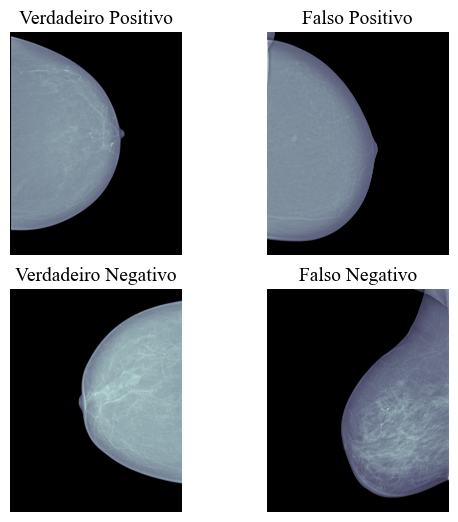

In [59]:

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(left=0.20, right=0.80, top=0.80, bottom=0.20, wspace=0.2, hspace=0.15)
id_iters = [7, 1, 0, 0]

for label, index, iterable, id_iter in zip(labels, indexes, iterables, id_iters):
    img_index = iterable[id_iter]
    ax[index[0], index[1]].imshow(dcmread(metadata_INBREAST[img_index]['metadata_csv']['image_path']).pixel_array,
                                  cmap=plt.cm.bone)
    ax[index[0], index[1]].set_title(f"{label}", family='Times New Roman', size=14)
    ax[index[0], index[1]].set_xticks([])
    ax[index[0], index[1]].axis('off')